Autor: Renan Tonolli Mondini - RA: 191010324 <br><hr>
# Trabalho 2

Importando as bibliotecas:

In [208]:
import math
import numpy as np
import sympy
from sympy import *
from sympy.solvers import solve
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import HTML
from IPython.display import Markdown as md
x = sympy.symbols('x')

##

Definindo as funções e plotando a intersecção de $y = cos(x)$ e $y = x^2 -6$

In [209]:
def f1(x):
    return sympy.cos(x)
def f2(x):
    return x**2 - 6
def f(x):
    return sympy.cos(x) - x**2 + 6 

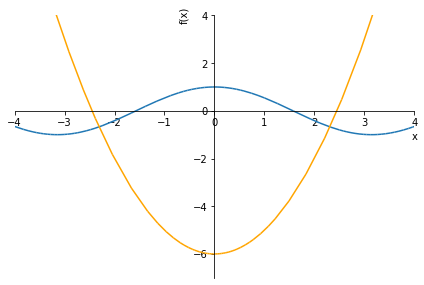

In [210]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-4,4),ylim=(-7,4), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Define-se os intervalos de $[a,b]$ como $[-3,-2]$ e $[2,3]$

##

In [211]:
a = -3
b = -2
e = 0.01
x_k1 = 0
lista_x_k = list()
lista_er = list()
lista_f_x = list()

Função que decide qual limite substituir por $x_k$

In [212]:
def escolher_lado(f_a, f_x, b, a, x_k1, x_k):
    if (f_a * f_x < 0):
        b = x_k
    else:
        a = x_k

    x_k1 = x_k
    return a, b, x_k1

Definindo o erro relativo como restrição <font size='10'> $\frac{|x_k-x_{k-1}|}{max\{x_{k},1\}}$ </font> 

In [213]:
def erro_relativo(x_k, x_k1, max_xk_1):
    return (abs(x_k - x_k1)/max_xk_1)

Realizando as iterações, tem-se:

In [214]:
def metodo_biseccao(a, b, e, x_k1):
    eh_1_iteração = True
    lista_er.clear()
    lista_f_x.clear()
    lista_x_k.clear()
    while True:

        x_k = (a + b)/2
        f_x = f1(x_k) - f2(x_k)
        f_a = f1(a) - f2(a)
        lista_x_k.append(x_k)
        lista_f_x.append(abs(f_x))
       
        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)

        lista_er.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f_x) >= e and erro_relativo(x_k, x_k1, max_xk_1) >= e ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
    
        elif eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        else: 
            break

    return x_k

In [215]:
x_k = metodo_biseccao(a, b, e, x_k1)

Plotando a tabela dos resultados obtidos pelas iterações.

In [216]:
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x, 'ER': lista_er})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |  Valor de x_k  |  Valor de f(x)  |    ER    |
|:--:|:--------------:|:---------------:|:--------:|
| 0  |   -2.500000    |    1.051144     | 1.000000 |
| 1  |   -2.250000    |    0.309326     | 0.111111 |
| 2  |   -2.375000    |    0.360903     | 0.052632 |
| 3  |   -2.312500    |    0.023201     | 0.027027 |
| 4  |   -2.281250    |    0.143721     | 0.013699 |
| 5  |   -2.296875    |    0.060423     | 0.006803 |

Após 6 iterações pode-se concluir que $x_k = 2,296875$. Além disso na sexta iteração o erro relativo é menor que a precisão de $\varepsilon$.

##

Utilizando a mesma equação do erro relativo como restrição $\frac{|x_k-x_{k-1}|}{max\{x_{k},1\}}$, bem como a equação que decide qual limite substituir por $x_k$, calculamos pelo método da falsa posição.

In [217]:
def metodo_falsa_posicao(a, b, e, x_k1):
    eh_1_iteração = True
    lista_er.clear()
    lista_f_x.clear()
    lista_x_k.clear()
    while True:

        f_a = float(f1(a) - f2(a))
        f_b = float(f1(b) - f2(b))
        x_k = (a * f_b - b * f_a)/(f_b - f_a)
        f_x = f1(x_k) - f2(x_k)
        lista_x_k.append(x_k)
        lista_f_x.append(abs(f_x))
        
        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)

        lista_er.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f_x) >= e and erro_relativo(x_k, x_k1, max_xk_1) >= e ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)

        elif eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        else: 
            break
    return x_k


Plotando a tabela dos resultados obtidos pelas iterações.

In [218]:
x_k = metodo_falsa_posicao(a, b, e, x_k1)
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x, 'ER': lista_er})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |  Valor de x_k  |  Valor de f(x)  |    ER    |
|:--:|:--------------:|:---------------:|:--------:|
| 0  |   -2.284158    |    0.128242     | 1.000000 |
| 1  |   -2.306449    |    0.009219     | 0.009665 |

Após 2 iterações pode-se concluir que $x_k = 2,306449$. Além disso na segunda iteração o erro relativo e o valor da f(x) são menores que a precisão de $\varepsilon$.

##

Utilizando a mesma equação do erro relativo como restrição $\frac{|x_k-x_{k-1}|}{max\{x_{k},1\}}$, bem como a equação que decide qual limite substituir por $x_k$, calculamos pelo método da bisecção e da falsa posição com $\varepsilon = 0,001$.

In [219]:
a = 3
b = 2
e = 0.0001
x_k1 = 1

In [220]:
x_k = metodo_biseccao(a, b, e, x_k1)

Plotando a tabela dos resultados obtidos pelas iterações do método da bisecção.

In [221]:
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x, 'ER': lista_er})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |  Valor de x_k  |  Valor de f(x)  |    ER    |
|:--:|:--------------:|:---------------:|:--------:|
| 0  |    2.500000    |    1.051144     | 0.600000 |
| 1  |    2.250000    |    0.309326     | 0.111111 |
| 2  |    2.375000    |    0.360903     | 0.052632 |
| 3  |    2.312500    |    0.023201     | 0.027027 |
| 4  |    2.281250    |    0.143721     | 0.013699 |
| 5  |    2.296875    |    0.060423     | 0.006803 |
| 6  |    2.304688    |    0.018651     | 0.003390 |
| 7  |    2.308594    |    0.002265     | 0.001692 |
| 8  |    2.306641    |    0.008196     | 0.000847 |
| 9  |    2.307617    |    0.002966     | 0.000423 |
| 10 |    2.308105    |    0.000351     | 0.000212 |
| 11 |    2.308350    |    0.000957     | 0.000106 |
| 12 |    2.308228    |    0.000303     | 0.000053 |

Após 13 iterações pode-se concluir que $x_k = 2,308228$. Além disso na décima terceira iteração o erro relativo é menor que a precisão de $\varepsilon$.

Plotando a tabela dos resultados obtidos pelas iterações do método da falsa posição.

In [222]:
x_k = metodo_falsa_posicao(a, b, e, x_k1)
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x, 'ER': lista_er})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |  Valor de x_k  |  Valor de f(x)  |    ER    |
|:--:|:--------------:|:---------------:|:--------:|
| 0  |    2.284158    |    0.128242     | 0.562202 |
| 1  |    2.306449    |    0.009219     | 0.009665 |
| 2  |    2.308048    |    0.000657     | 0.000693 |
| 3  |    2.308162    |    0.000047     | 0.000049 |

Após 4 iterações pode-se concluir que $x_k = 2,308162$. Além disso na quarta iteração o erro relativo é menor que a precisão de $\varepsilon$.

##

Definindo a função e sua derivada

In [223]:
def f(x):
    return sympy.sin(6.3*x)/6.3 - 12.6*x**3

In [224]:
def f_dx(x):
    return sympy.cos(6.3*x) - 37.8*x**2

Definindo um valor inicial de $x_k = -2,5$ e $\varepsilon = 0,0001$

In [225]:
x_k = 0.4
e = 0.001
lista_x_k.clear()
lista_f_dx = list()
lista_f_x = list()
lista_e = list()

Definindo o erro relativo como restrição <font size='10'> $\frac{|x_k-x_{k-1}|}{max\{x_{k},1\}}$ </font> 

In [226]:
def erro_relativo(x_k, x_k1, max_xk_1):
    return (abs(x_k - x_k1)/max_xk_1)

Realizando as iterações do método de Newton:

In [227]:
def metodo_newton(x_k, e):
    eh_1_iteração = True
    x_k1 = 0
    while True:

        lista_x_k.append(x_k)
        lista_f_x.append(f(x_k))
        lista_f_dx.append(f_dx(x_k))

        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)
        
        lista_e.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f(x_k)) >= e and erro_relativo(x_k, x_k1, max_xk_1) > e):
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
        
        elif eh_1_iteração and abs(f(x_k)) >= e:
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
            eh_1_iteração = False

        else:
            break
    return x_k

In [228]:
x_k = metodo_newton(x_k, e)

Plotando a tabela dos resultados obtidos pelas iterações.

In [229]:
df = pd.DataFrame({'x_k': lista_x_k,'f_dx(x_k)': lista_f_dx, 'f(x_k)': lista_f_x,'ER': lista_e})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |   x_k    |  f_dx(x_k)  |  f(x_k)   |    ER    |
|:--:|:--------:|:-----------:|:---------:|:--------:|
| 0  | 0.400000 |  -6.860952  | -0.713967 | 0.400000 |
| 1  | 0.295938 |  -3.599901  | -0.174629 | 0.104062 |
| 2  | 0.247428 |  -2.302147  | -0.032143 | 0.048509 |
| 3  | 0.233466 |  -1.960550  | -0.002402 | 0.013962 |
| 4  | 0.232241 |  -1.931302  | -0.000018 | 0.001225 |

Após 3 iterações pode-se concluir que $x_k = 2,308173$. Além disso na terceira iteração o valor da f(x) é menor que a precisão de $\varepsilon$.

##

Definindo a função $g(x) = \sqrt{cos(x) + 6}$

In [230]:
def g(x):
    return sqrt(sympy.cos(x) + 6)

Calculando a derivada de $g(x)$:

In [231]:
g_dx = diff(g(x), x)
g_dx

-sin(x)/(2*sqrt(cos(x) + 6))

Analisando a função é possível visualizar que a função $sen(x)$ e $cos(x)$ são periódicas e assumirão intervalos de -1 a 1, assim o maior valor que o numerador pode assumir é 1, e o menor valor que o denominador pode assumir será $2\sqrt{6}$. Portanto, para qualquer valor de $x$ variando nos reais a função retornará valores entre 0 e $\frac{1}{2\sqrt{5}}$, respeitando a inequação $|\frac{-sen(x)}{2\sqrt{cos(x) + 6}}| < 1$.

Definindo um valor inicial de $x_k = 2,5$ e $\varepsilon = 0,001$

In [232]:
x_k = 2.5
e = 0.001
lista_x_k = list()
lista_g_x = list()
lista_f_x = list()
lista_e = list()

Realizando as iterações do método de ponto fixo:

In [233]:
def metodo_ponto_fixo(x_k, e):

    while True:

        lista_x_k.append(x_k)
        x_k1 = x_k
        x_k = g(x_k)
        lista_g_x.append(x_k)
        lista_f_x.append(abs(f(x_k)))

        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)
        
        lista_e.append(abs(x_k - x_k1)/max_xk_1)
    
        if(abs(f(x_k)) >= e and erro_relativo(x_k, x_k1, max_xk_1) > e):
            continue

        else:
            break

    return x_k1

In [234]:
x_k1 = metodo_ponto_fixo(x_k, e)

Plotando a tabela dos resultados obtidos pelas iterações.

In [235]:
df = pd.DataFrame({'x_k': lista_x_k,'g(x_k)': lista_g_x, 'f(x_k)': lista_f_x, 'ER': lista_e})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |   x_k    |  g(x_k)  |   f(x_k)   |    ER    |
|:--:|:--------:|:--------:|:----------:|:--------:|
| 0  | 2.500000 | 2.280100 | 149.204661 | 0.096443 |
| 1  | 2.280100 | 2.312724 | 155.718628 | 0.014106 |
| 2  | 2.312724 | 2.307442 | 154.650959 | 0.002289 |
| 3  | 2.307442 | 2.308288 | 154.821548 | 0.000366 |

Após 4 iterações pode-se concluir que $x_k = 2,308288$. Além disso na quarta iteração o erro relativo e o valor da f(x) são menores que a precisão de $\varepsilon$.

##

Portanto, pelas mesmas razões explicadas para os intervalos positivos de x para a função $|\frac{-sen(x)}{2\sqrt{cos(x) + 6}}|$, pode-se usar valores negativos pois a função é em módulo, tornando qualquer valor negativo em positivo. 

##

Definindo um valor inicial de $x_k = 2,5$ e $x_{k-1} = 2$ e $\varepsilon = 0,001$

In [236]:
x_k = 2.50
e = 0.001
lista_x_k.clear()
lista_f_dx = list()
lista_f_x = list()
lista_e = list()

Definindo a função f(x) e sua derivada a partir de $f'(x_k) = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$

In [237]:
def f(x):
    return sympy.cos(x) - x**2 + 6

In [238]:
def f_dx(x):
    return (f(x) - f(x_k1))/(x - x_k1)

Realizando as iterações do método das secantes:

In [239]:
def metodo_das_secantes(x_k, e):
    eh_1_iteração = True
    x_k1 = 2
    while True:

        lista_x_k.append(x_k)
        lista_f_x.append(f(x_k))
        lista_f_dx.append(f_dx(x_k))

        if abs(x_k) < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = abs(x_k)
        
        lista_e.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f(x_k)) >= e and erro_relativo(x_k, x_k1, max_xk_1) > e):
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
        
        elif eh_1_iteração and abs(f(x_k)) >= e:
            x_k1 = x_k
            x_k = x_k - (f(x_k)/f_dx(x_k))
            eh_1_iteração = False

        else:
            break
    return x_k

In [240]:
x_k = metodo_das_secantes(x_k, e)

Plotando a tabela dos resultados obtidos pelas iterações.

In [241]:
df = pd.DataFrame({'x_k': lista_x_k,'f_dx(x_k)': lista_f_dx, 'f(x_k)': lista_f_x,'ER': lista_e})
md(df.to_markdown(numalign = 'center', stralign = 'center', floatfmt = '.6f', index=True))

|    |   x_k    |  f_dx(x_k)  |  f(x_k)   |    ER    |
|:--:|:--------:|:-----------:|:---------:|:--------:|
| 0  | 2.500000 |  -5.479118  | -1.051144 | 0.200000 |
| 1  | 2.308155 |  -5.356083  | 0.000088  | 0.083116 |

Após 2 iterações pode-se concluir que $x_k = 2,308155$. Além disso na segunda iteração e o valor da f(x) é menor que a precisão de $\varepsilon$.